# 載入一些套件與基本宣告

In [92]:
%pylab inline
import time
import re
import matplotlib.pyplot as plt
import pandas as pd
import string
import codecs
import os
import jieba
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn import naive_bayes as bayes
from sklearn.model_selection import train_test_split
#簡轉繁
from hanziconv import HanziConv

#ham與spam的每封郵件list
ham_text = []
spam_text = []
#ham與spam的數據集
ham_data = []
spam_data = []
#取得目前工作目錄
SaveDirectory = os.getcwd() 
#獲得文檔列表
listham = os.listdir(SaveDirectory+'\\data\\normal')
listspam = os.listdir(SaveDirectory+'\\data\\spam')
#數據集數量

print('spam total：',len(listspam))
print('ham total：',len(listham))


Populating the interactive namespace from numpy and matplotlib
spam total： 7775
ham total： 7063


C:\Users\zxc98\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf', 'f', 'text', 'random', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# 將ham文本資料轉成繁體並存成DATAFrame

In [93]:
for fileName in listham:
        with open('data/normal/'+fileName, 'r',encoding='gbk') as f:
            #文本每一列儲存
            text=[]
            # 過濾非中文字符，正規化
            for line in f.readlines():
                pattern = re.compile('[^\u4e00-\u9fa5]') #正規化(去除非中文字符)
                line = pattern.sub("", line) #將其他字符取代為""
                content = line.strip().split() #去除一些空白.換行
                text = text+content #儲存這個文本的內容
            text = " ".join(text) #將文本內容list加入全部文本的list
            ham_text.append(HanziConv.toTraditional(text)) #簡轉繁
ham_data = pd.DataFrame(ham_text,columns=['text']) #將list改成dataframe
ham_data['label']='0' #將資料類別加上 0:ham 1:spam
ham_data.head()


,text,label
0,這事兒還有續集 因為我姐她們買房子後來裝修的時候沒錢她婆婆他們就贊助瞭萬塊 這下一吵她婆婆就...,0
1,越發覺得這個姐夫不錯瞭 那萬還是趕緊還瞭吧 標題姐姐快要生孩子瞭很感慨 發信站水木社區站內 ...,0
2,或許某些農村吧 在一個當性彆勞動力富裕程度的地方還是可以理解的 標題姐姐快要生孩子瞭很感慨 ...,0
3,最近經常看到你說一些很武斷的話 所謂保胎確實是要躺在床上不能動的尤其是先兆流産有齣血的時候 ...,0
4,他們分手是說性格不閤 沒多久然後我們交往 還算比較愉快 當初因為他經常和聯係我曾跟他吵過多次...,0


# 將spam文本資料轉成繁體並存成DATAFrame

In [94]:
for fileName in listspam:
        with open('data/spam/'+fileName, 'r',encoding='gbk') as f:
            text=[]
            # 过滤掉非中文字符
            for line in f.readlines():
                pattern = re.compile('[^\u4e00-\u9fa5]')
                line = pattern.sub("", line)
                content = line.strip().split()
                text = text+content
            text = " ".join(text)
            spam_text.append(HanziConv.toTraditional(text))
spam_data = pd.DataFrame(spam_text,columns=['text'])
spam_data['label']='1'
spam_data.head()

,text,label
0,會員注冊邀請書 全國最低價域名空間大放送 國際頂級域名注冊驚暴價元年元年連續注冊年以上 國傢...,1
1,你好 以茶會友以茶聯誼喝茶就喝安溪鐵觀音 本廠是專業生産批發各等級鐵觀音茶葉的購買聯係 在綫...,1
2,尊敬的先生小姐 您好 首先感謝您抽時間查看以下信息 我公司一直緻力於研發生産銷售施工環氧樹脂...,1
3,先生 你好 批發麻醉藥催情藥墮胎藥避孕藥飲料型噴霧型香煙型揮發型等各類國際國內製藥企業推齣的...,1
4,貴公司負責人經理財務您好 我是深圳市創偉實業有限公司的我司實力雄厚有著良 好的社會關係也有部...,1


# 將ham與spam組合並打亂

In [95]:
all_data = pd.concat([spam_data,ham_data],axis=0, ignore_index=True)  #將ham lsit與spam list串起來
all_data = all_data.sample(frac=1).reset_index(drop=True) #sample frac = 1 是把數據都打亂 resr_index是把index也重設
print('data shape：',all_data.shape)
print('spams in rows：',all_data.loc[all_data['label']=="1"].shape[0])
print('hams in rows：',all_data.loc[all_data['label']=="0"].shape[0])
all_data.head()

data shape： (14838, 2)
spams in rows： 7775
hams in rows： 7063


,text,label
0,你好本公司有各種發票普通發票增值稅發票運輸發票廣告發票等可代開 有需要者請電聯係人劉暉先生電話,1
1,我先來派個馬匹 標題開版瞭 發信站水木社區站內 嗬嗬 歡迎訂購水木站衫並選擇在號樓領取的同學...,0
2,尊敬的公司工廠經理負責人你好 我公司是一傢多年為外資企業代理進齣口業務的公司現有部分稅額如增...,1
3,論文徵稿 黑龍江科技信息雜誌是經國傢科技部和國傢新聞齣版總署批準在國內外公開發行的大型綜閤性...,1
4,代發郵件萬封元 個網站信息元聯係電話 傳真 聯係 郵箱 我們以誠信的服務迎取您的續簽閤同 一...,1


# 載入停用詞

In [96]:
#載入 停用詞 (stopwords) 自動過濾掉某些字或詞
stopwords = codecs.open(os.path.join(SaveDirectory+'\data', 'stopwords_tr.txt'), 'r', 'utf-8').read().split('\r\n')

# 將文本利用Jieba斷詞、過濾停用詞

In [97]:
processed_texts = []
for text in all_data["text"]:
    words = []
    seg_list = jieba.cut(text) #利用Jieba斷詞
    for seg in seg_list: 
        # isalpha()檢測詞是否由字符組成，且不在停用詞的list中
        if (seg.isalpha()) & (seg not in stopwords):
            words.append(seg)
    sentence = " ".join(words)
    processed_texts.append(sentence)
all_data["text"] = processed_texts #利用過濾且斷好的詞取代文本
all_data.head()

,text,label
0,你好 公司 發票 普通 發票 增值 稅發票 運輸 發票 廣告 發票 可代開 需要 請 電聯 ...,1
1,先來 派 個馬匹 標題 開版 瞭 發信 站 社區 站 歡迎 訂購 站衫 並選擇 號樓 領取 ...,0
2,尊敬 公司 工廠 經理 負責人 你好 公司 傢 多年 外資 企業 代理 進 齣 口業務 公司...,1
3,論文 徵稿 黑龍江 科技 信息 雜誌 經國 傢 科技部 和國 傢 新聞 齣 版 總署 批準 ...,1
4,代發 郵件 萬 封元 網站 信息 元聯 係 電話 傳真 聯 係 郵箱 以誠信 服務 迎取 續...,1


# 將文字雲套入某張圖遮罩

In [98]:
from PIL import Image
import numpy as np
icon_path = 'cloud.png'
icon = Image.open(icon_path)
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)
from wordcloud import ImageColorGenerator
color_func = ImageColorGenerator(mask)

# 文字雲的文字顏色

In [99]:
import random
from palettable.colorbrewer.sequential import YlOrRd_9  # choose the color set you like
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(YlOrRd_9.colors[random.randint(0,8)]) # we got 9 colors, so we generate random number from 0 to 8
# https://jiffyclub.github.io/palettable/colorbrewer/sequential/

# 定義產生文字雲的參數

In [100]:
#word cloud
def showWordCloud(text,max_words):
    wc = WordCloud(
    background_color='black', #背景色
    max_words=max_words, #最大詞個數
    font_path='NotoSansCJKtc-Black.otf',  #中文字體才能正常顯示
    min_font_size=5,
    max_font_size=200, 
    width=500,
    height=500,
    mask=mask, # 遮罩
    prefer_horizontal=0.5 #產生多少詞水平垂直
    )
    wordcloud = wc.generate_from_text(text)
    wc.recolor(color_func=color_func, random_state=2)
    plt.rcParams["figure.figsize"] = (25,25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')



all words cloud:


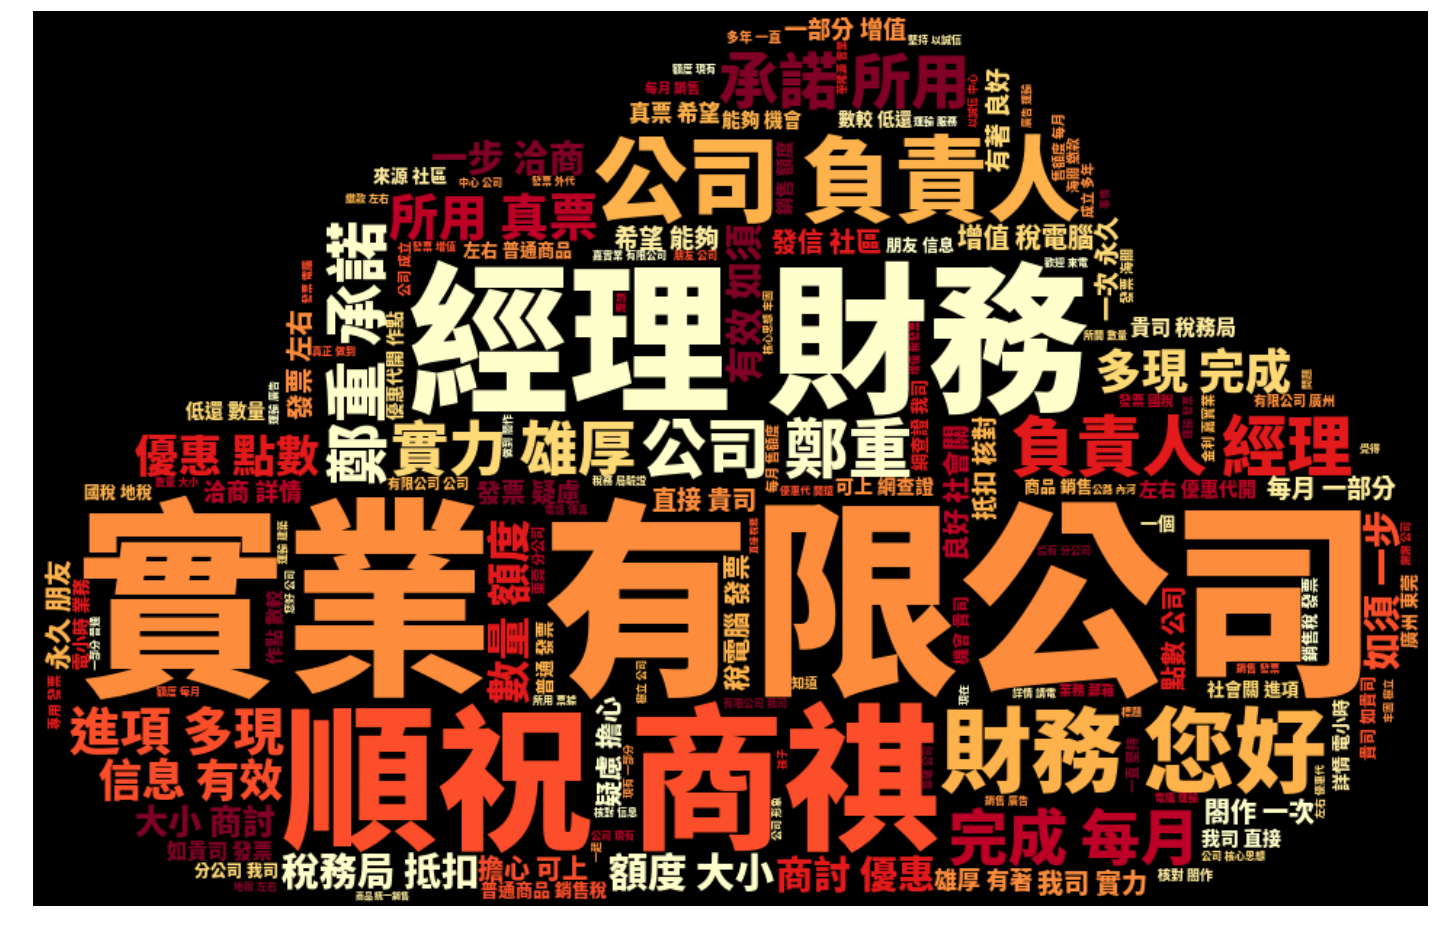

In [101]:
#產生所有詞文字雲
print("all words cloud:")
showWordCloud(" ".join(all_data["text"]),150)

spam words cloud:


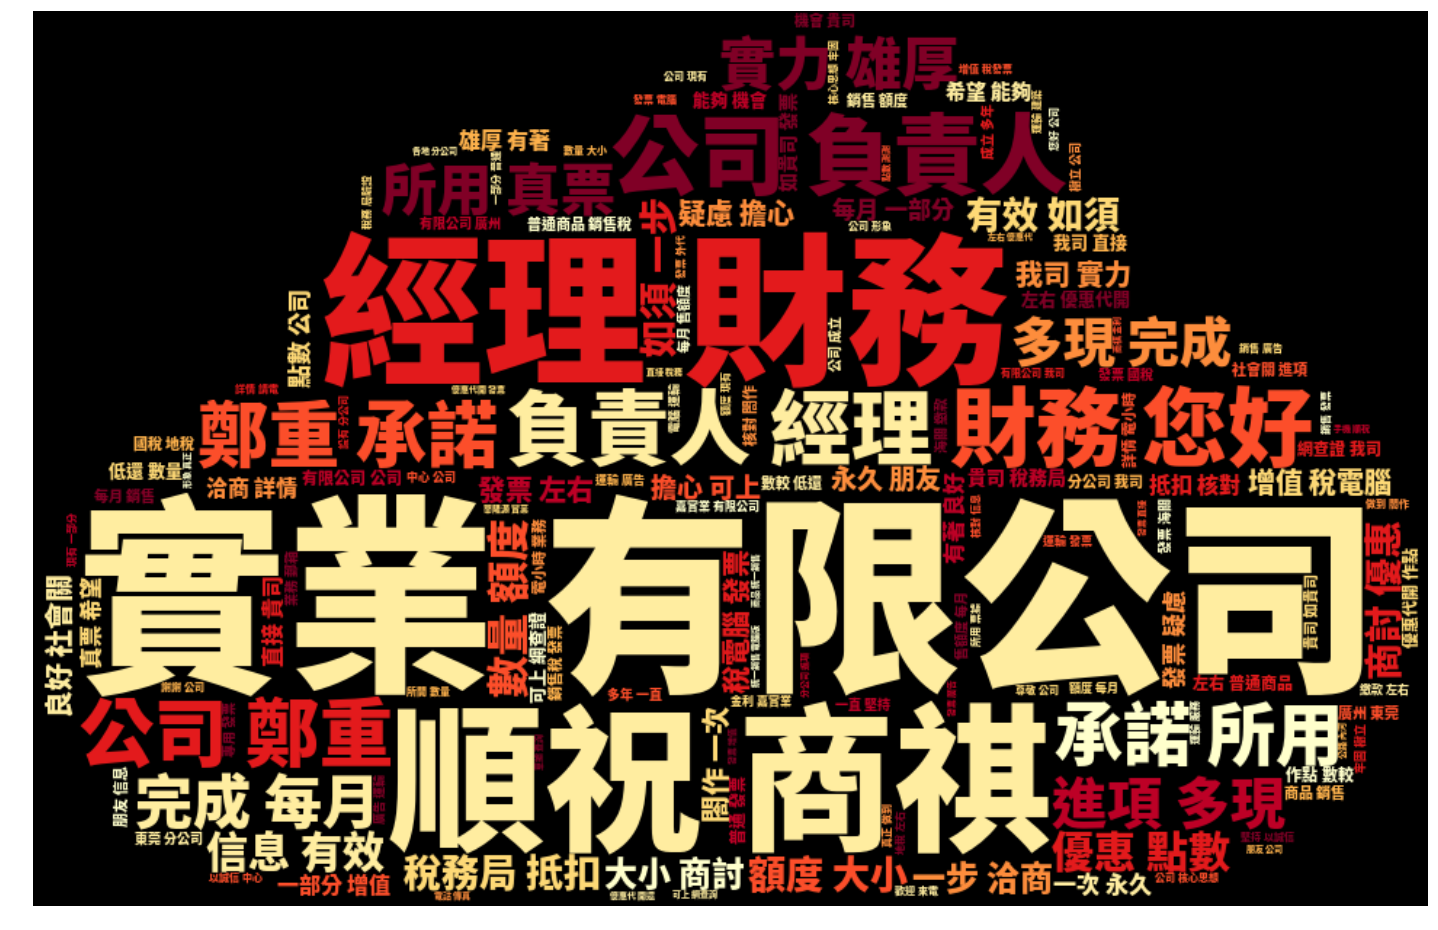

In [102]:
#產生SPAM詞文字雲
print("spam words cloud:")
showWordCloud(" ".join(all_data[all_data['label']=="1"]['text']),150)

ham words cloud:


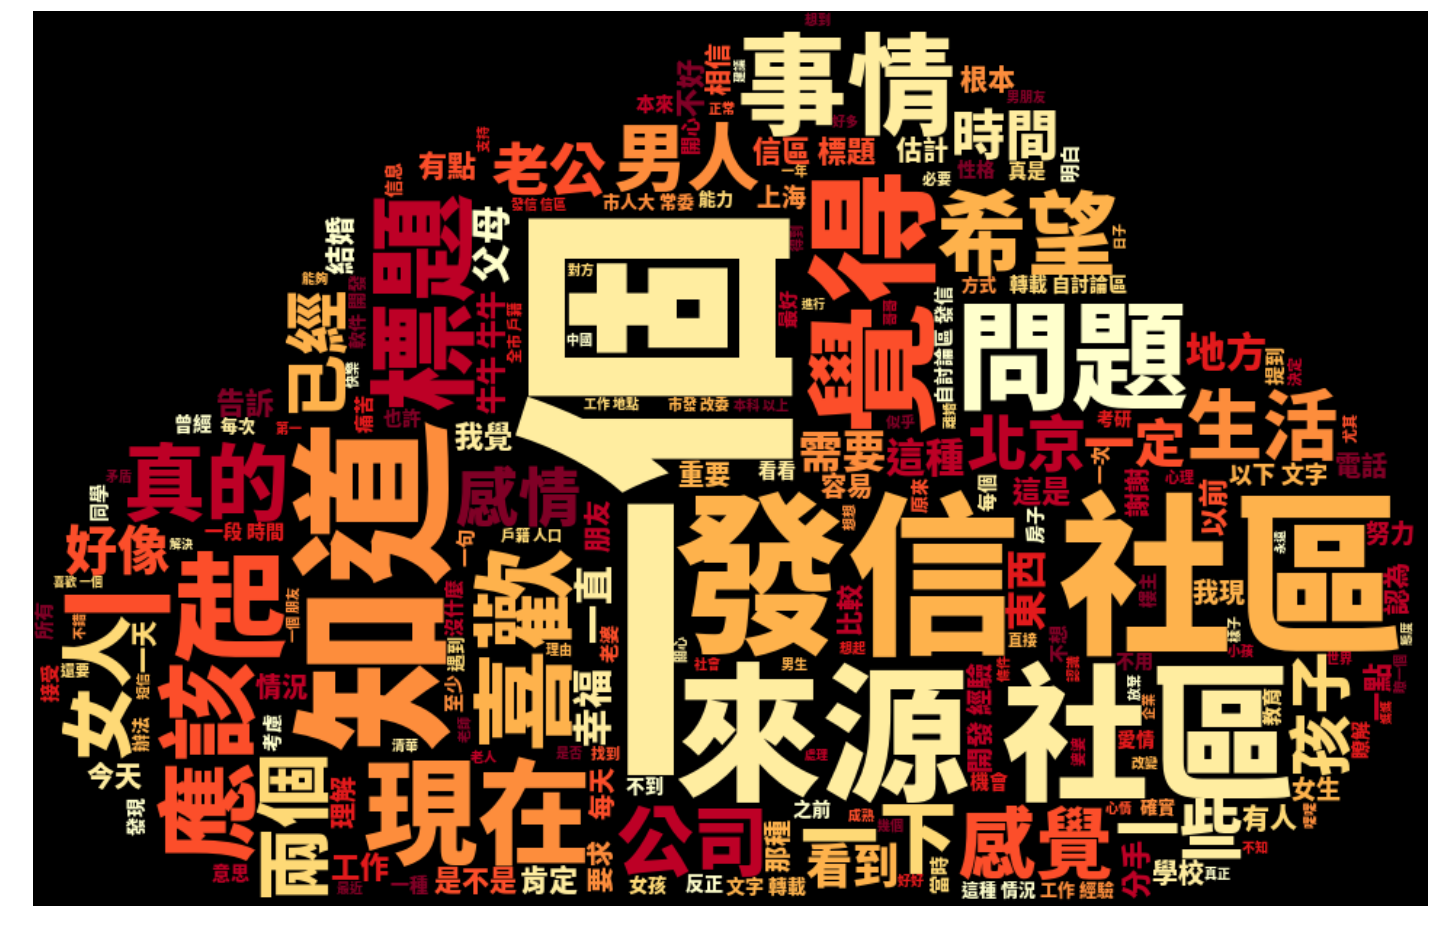

In [103]:
#產生HAM詞文字雲
print("ham words cloud:")
showWordCloud(" ".join(all_data[all_data['label']=="0"]['text']),200)

In [104]:
#transform text to sparse matrix
def transformTextToSparseMatrix(texts):
    vectorizer = CountVectorizer(binary=False)
    vectorizer.fit(texts)

    #inspect vocabulary
    vocabulary = vectorizer.vocabulary_
    print("There are ", len(vocabulary), " word features")
    
    vector = vectorizer.transform(texts)
    result = pd.DataFrame(vector.toarray())
    
    keys = []
    values = []
    for key,value in vectorizer.vocabulary_.items():
        keys.append(key)
        values.append(value)
    df = pd.DataFrame(data = {"key" : keys, "value" : values})
    colnames = df.sort_values("value")["key"].values
    result.columns = colnames
    return result

In [105]:
textmatrix = transformTextToSparseMatrix(all_data["text"])
textmatrix.head(3)

There are  66009  word features


,一一,一丁,一上,一上午,一上網,一下,一下下,一下周,一下子,一下手,...,龐大技術,龐大是,龐大本,龐大的專,龐笑靨,龐統,龔德,龔紹帆,龜侃,龜大
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
#pop freq words
features = pd.DataFrame(textmatrix.apply(sum, axis=0))
extractedfeatures = [features.index[i] for i in range(features.shape[0]) if features.iloc[i, 0] > 10]
textmatrix = textmatrix[extractedfeatures]
print("There are ", textmatrix.shape[1], " word features")

There are  9547  word features


In [107]:
#traindate & testdata
train, test, trainlabel, testlabel = train_test_split(textmatrix, all_data["label"], test_size = 0.2)

In [108]:
#train model
clf = bayes.BernoulliNB(alpha=1, binarize=True)
model = clf.fit(train, trainlabel)

In [109]:
#model score
model.score(test, testlabel)

0.9336253369272237